In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import random

In [2]:
cols = ['alcohol_by_weight', 'rating', 'bitterness', 'nitrogen', 
        'turbidity', 'sugars', 'degree_of_fermentation', 
        'calorific_value', 'density', 'pH', 'colour', 'sulphites']

cols_new = ['alcohol_by_weight', 'bitterness', 'nitrogen', 
            'turbidity', 'sugars', 'degree_of_fermentation', 
            'calorific_value', 'density', 'pH', 'colour', 'sulphites', 'rating']

df = pd.read_table("beer_ratings.txt", names = cols)

df = df[cols_new]

df.describe()

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,4.964243,9.637821,0.628862,0.939390,16.305962,68.374036,18.389957,0.966954,3.803814,14.106389,14.020433,67.323718
std,0.521894,1.852364,0.187830,0.662604,8.465123,35.483428,10.147082,0.001937,0.157151,3.726049,10.288885,10.047955
min,4.000000,5.700000,0.220000,0.000000,7.560000,9.384000,4.000000,0.960640,3.240000,7.095000,1.875000,38.000000
25%,4.523810,8.300000,0.490000,0.332000,11.970000,55.522000,10.000000,0.965770,3.700000,11.825000,6.562500,60.000000
50%,4.809524,9.300000,0.620000,0.896400,13.860000,62.560000,16.000000,0.966935,3.800000,13.330000,11.250000,64.000000
75%,5.238095,10.700000,0.740000,1.494000,17.010000,71.944000,24.000000,0.968100,3.900000,15.748750,18.515625,74.000000
max,7.095238,17.000000,1.680000,3.320000,86.940000,477.020000,69.000000,0.973200,4.400000,43.000000,90.312500,94.000000


In [3]:
scaler = StandardScaler() 
df = pd.DataFrame(scaler.fit_transform(df), columns = cols_new)

X = df.iloc[:, :-1] # Independent Variables

y = df.iloc[:, -1] # Dependent Variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

df.describe()

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-1.502715e-15,-6.167906e-17,5.954401e-17,-8.065723e-18,8.101307e-17,2.293986e-16,1.053289e-16,4.555188e-14,-2.280939e-16,2.775558e-16,-1.448865e-16,8.316591e-16
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.848573e+00,-2.126972e+00,-2.177935e+00,-1.418483e+00,-1.033728e+00,-1.663356e+00,-1.418896e+00,-3.261357e+00,-3.589647e+00,-1.882728e+00,-1.181073e+00,-2.919937e+00
25%,-8.443659e-01,-7.226094e-01,-7.396939e-01,-9.171614e-01,-5.124887e-01,-3.623919e-01,-8.272765e-01,-6.117196e-01,-6.609553e-01,-6.126083e-01,-7.252409e-01,-7.292661e-01
50%,-2.966164e-01,-1.824701e-01,-4.720724e-02,-6.491472e-02,-2.891002e-01,-1.639398e-01,-2.356574e-01,-9.998881e-03,-2.428332e-02,-2.084793e-01,-2.694086e-01,-3.309623e-01
75%,5.250079e-01,5.737249e-01,5.920112e-01,8.374641e-01,8.321378e-02,1.006631e-01,5.531681e-01,5.917219e-01,6.123887e-01,4.410138e-01,4.371315e-01,6.647971e-01
max,4.085380e+00,3.976602e+00,5.599223e+00,3.594733e+00,8.348585e+00,1.152269e+01,4.990311e+00,3.225864e+00,3.795749e+00,7.758636e+00,7.418963e+00,2.656316e+00


In [4]:
df.corr().style.background_gradient(cmap = 'coolwarm')

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
alcohol_by_weight,1.000000,-0.016824,-0.210243,0.167979,0.103502,-0.219820,-0.137138,-0.439275,0.164576,0.182277,-0.179765,0.485269
bitterness,-0.016824,1.000000,-0.267128,0.714752,0.157287,0.097563,-0.152302,0.692441,-0.696943,0.219821,-0.100906,0.184049
nitrogen,-0.210243,-0.267128,1.000000,-0.553430,0.014922,0.077959,-0.000771,0.015526,0.245762,-0.321050,0.073513,-0.460148
turbidity,0.167979,0.714752,-0.553430,1.000000,0.164361,0.197110,-0.047851,0.395288,-0.568624,0.362208,0.012473,0.325147
sugars,0.103502,0.157287,0.014922,0.164361,1.000000,0.056434,0.111773,0.333236,-0.126374,0.011596,0.157443,0.038322
degree_of_fermentation,-0.219820,0.097563,0.077959,0.197110,0.056434,1.000000,0.003139,0.205604,-0.259548,0.327863,0.003468,-0.130206
calorific_value,-0.137138,-0.152302,-0.000771,-0.047851,0.111773,0.003139,1.000000,-0.039410,0.009576,-0.008716,0.689033,-0.082588
density,-0.439275,0.692441,0.015526,0.395288,0.333236,0.205604,-0.039410,1.000000,-0.366854,0.138441,0.042346,-0.133847
pH,0.164576,-0.696943,0.245762,-0.568624,-0.126374,-0.259548,0.009576,-0.366854,1.000000,-0.196386,-0.065321,-0.120790
colour,0.182277,0.219821,-0.321050,0.362208,0.011596,0.327863,-0.008716,0.138441,-0.196386,1.000000,-0.000656,0.354907


from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.5 * (1 - 0.5)))
sel.fit_transform(X)
sel.fit_transform(y)

In [5]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [6]:
model.score(X_train, y_train)

0.42036806271004346

In [7]:
model.score(X_test, y_test)

0.4087336577126648

In [8]:
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}
grid = GridSearchCV(model, parameters, cv = 10)

In [9]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [10]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [11]:
lr = LinearRegression(copy_X = True, fit_intercept = False, normalize = True)

In [12]:
model_optimised = lr.fit(X_train, y_train)

In [13]:
model_optimised.score(X_train,y_train)

0.42024991889843877

In [14]:
model_optimised.score(X_test,y_test)

0.40959579452623607

In [15]:
pred_train = cross_val_predict(model_optimised, X_train, y_train, cv = 10)

In [16]:
pred_test = cross_val_predict(model_optimised, X_test, y_test, cv = 10)

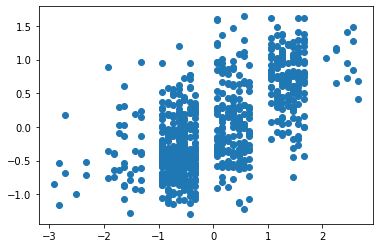

In [17]:
plt.scatter(y_train, pred_train)

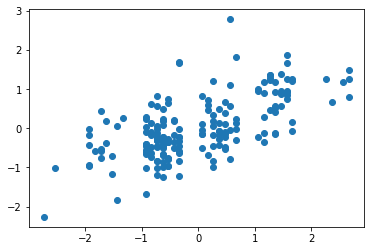

In [18]:
plt.scatter(y_test, pred_test)

In [19]:
metrics.r2_score(y_train, pred_train)

0.3949651251438844

In [20]:
metrics.r2_score(y_test, pred_test)

0.4010678377461203

In [21]:
np.sqrt(metrics.mean_squared_error(y_train, pred_train))

0.763412585486707

In [22]:
np.sqrt(metrics.mean_squared_error(y_test, pred_test))

0.8271899011954251

In [23]:
(metrics.mean_absolute_error(y_train, pred_train))

0.5944872467728307

In [24]:
(metrics.mean_absolute_error(y_test, pred_test))

0.6526129079897162